<a href="https://colab.research.google.com/github/pavan-potnuru/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction(Final)_SMOTENC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Project Name - 10 year Coronary Heart Disease Risk prediction</b>

<b>Project type</b> - Classification

<b>Contribution</b> - Individual

#<b>Problem Statement</b>

Cardiovascular diseases are very common these days due to the change in lifestyle and poor eating habits. So predicting the risk of cardiovascular disease for a given person by analysing his/her data from the past can save them if they act early against the disease. In this project, you will analyze the data of patients from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts on different attributes and study how the parameters are affecting the chances of having a Coronary Heart Disease. The goal is to predict whether a patient has a 10-year risk of future Coronary Heart Disease (CHD).

#<b> *Let's Begin!*</b>

##**1.Know your Data**

###**Import Libraries**

In [ ]:
# hiding all warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing all the important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [ ]:
# Connecting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Load the Data**

In [ ]:
#Load Data
dataset = pd.read_csv("/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv")

#Making a copy
df = dataset.copy()


###**Dataset first view**

In [ ]:
#First look of the data
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


###**Dataset rows and columns count**

In [ ]:
#Shape of the data
df.shape

(3390, 17)

###**Dataset Information**

In [ ]:
# Knowing the data types and non-null values count for each feature
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

####**Null values**

In [ ]:
# Checking for null values
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Education, cigsPerDay , totchol, and glucose have null values

####**Duplicate value count**

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

0

####What did you know about the data?

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). 

The dataset provides the patients’ information. It includes
3,390 records and 15 attributes.

There are few null values in few columns and there are no duplicate values.

Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

# **Exploratory Data Analysis**

## **Univariate Analysis**

###**Distribution of the dependent variable:**

In [ ]:
# Value counts for Dependent variable
dep_variable = 'TenYearCHD'
df[dep_variable].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

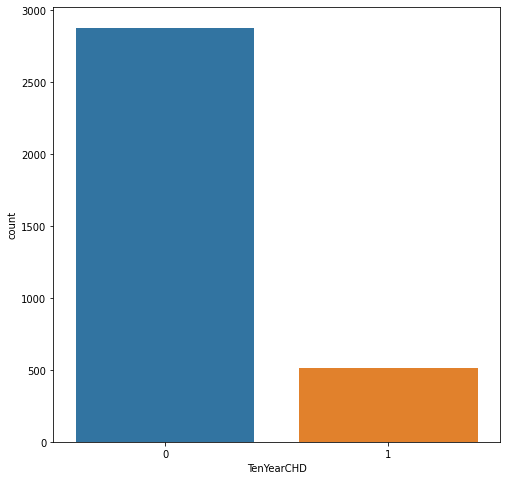

In [ ]:
# Plotting the countplot for dependent variable
dep_variable = 'TenYearCHD'
plt.figure(figsize = (8,8))
sbn.countplot(df[dep_variable])
plt.show()

**Out of 3,390 records** 

  **-> 2,879 are 0 (84.92%)**

  **-> 511 are 1  (15.07%)**

**The dependent variable - 10-year risk of coronary heart disease is unbalanced. Only ~15% of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.**

### **Analyzing the distribution of the continuous independent variables:**

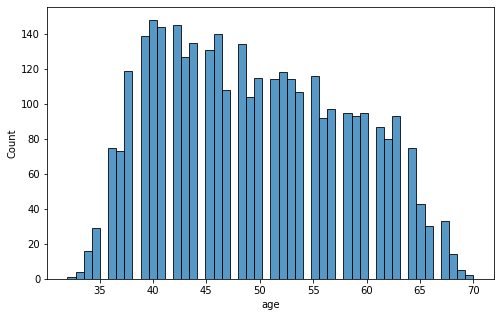

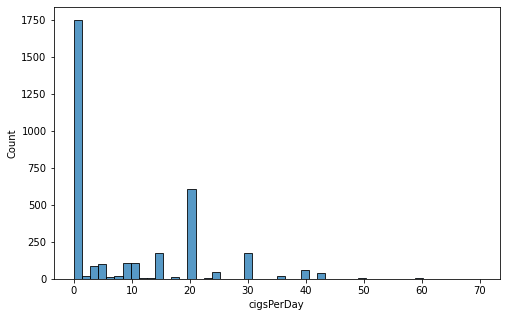

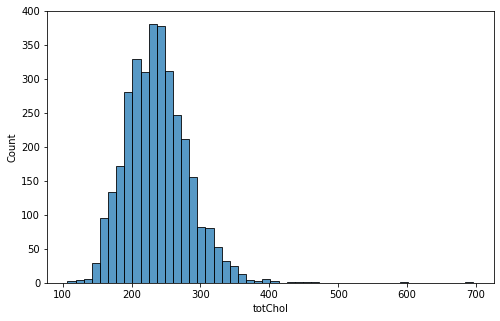

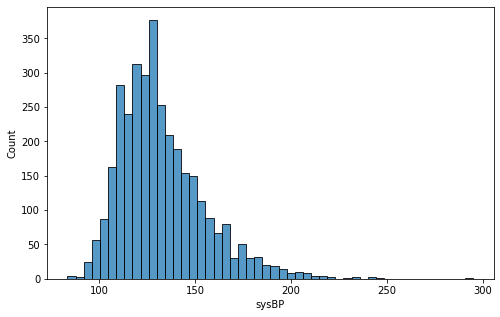

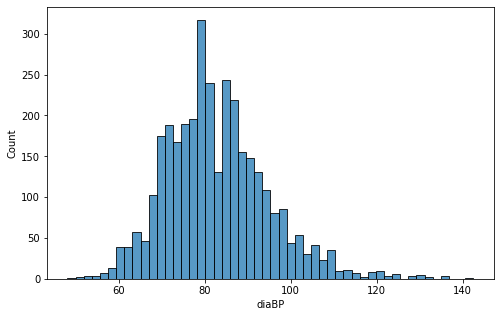

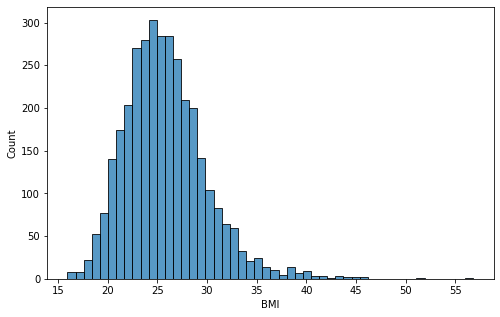

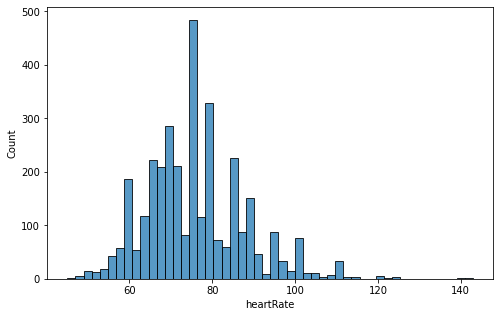

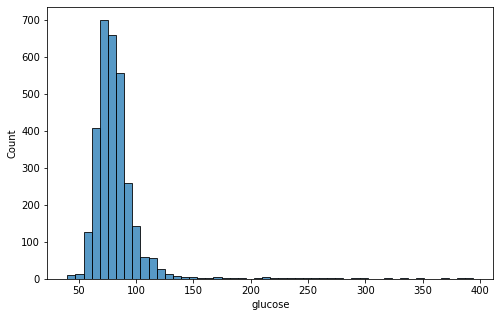

In [ ]:
# Plotting distribution of values of cts numerical features
cts_features = ['id','age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
for col in cts_features[1:]:
  plt.figure(figsize = (8,5))
  sbn.histplot(df[col], bins = 50)

**Most of the numerical features are skewed and contains outliers.**

###**Analyzing the distribution of the discrete independent variables:**

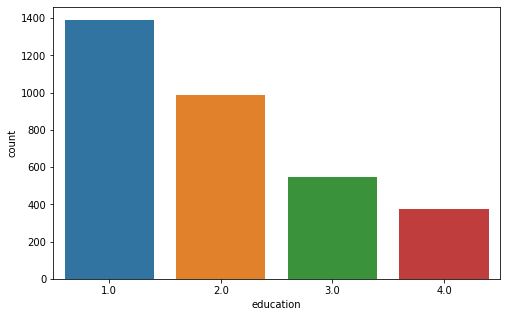

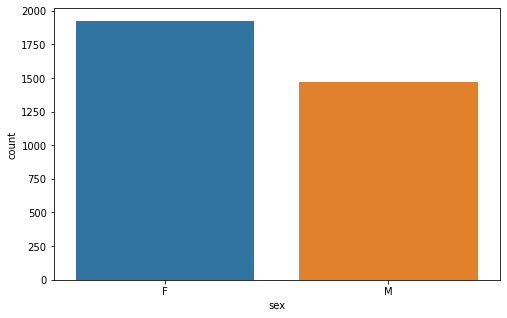

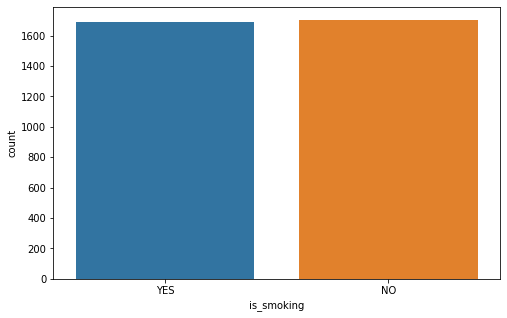

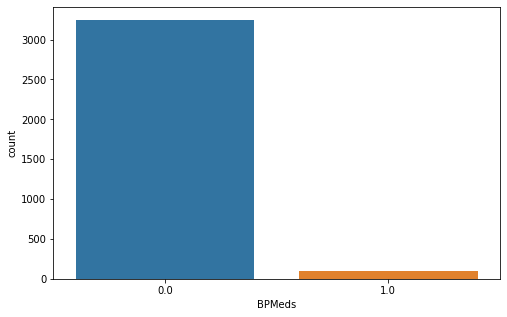

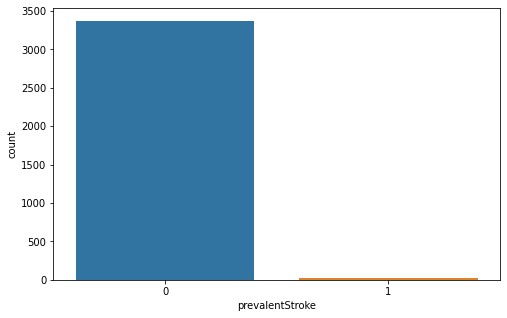

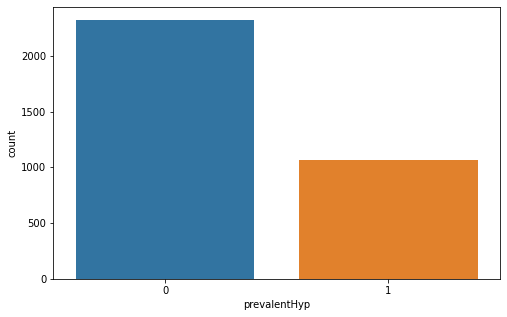

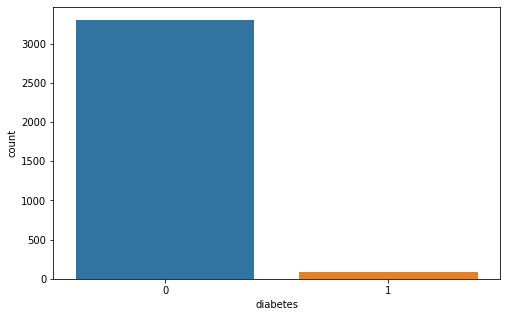

In [ ]:
# plotting the count plot of categorical features
cat_features = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
for col in cat_features:
  plt.figure(figsize = (8,5))
  sbn.countplot(df[col])
  plt.show()

**Summary:**
* **Majority of the patients belong to the education level 1, followed by 2, 3, and 4 respectively.**
* **There are more female patients compared to male patients.**
* **Almost half the patients are smokers.**
* **100 patients under the study are undertaking blood pressure medication.**
* **22 patients under the study have experienced a stroke.**
* **1069 patients have hypertension.**
* **87 patients have diabetes.**

##**Bivariate analysis**



###**Analyzing the relationship between the dependent variable and the continuous variables in the data**

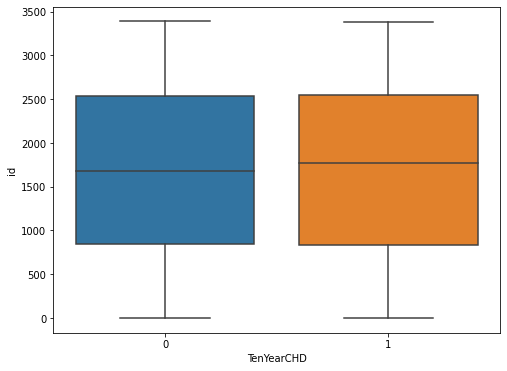

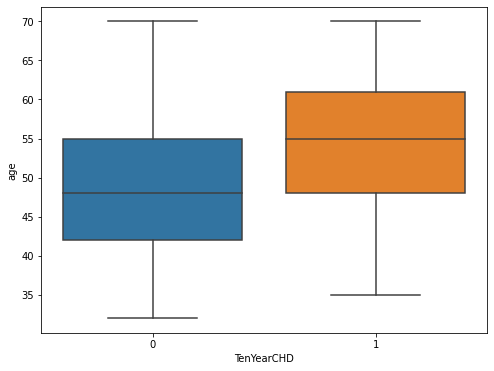

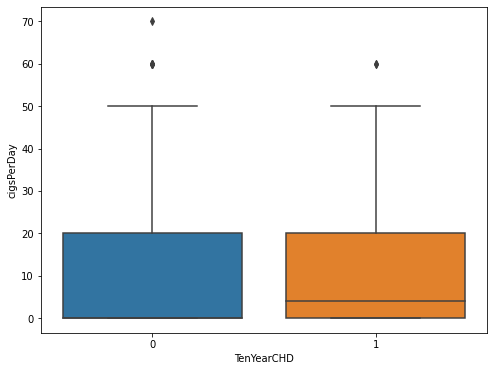

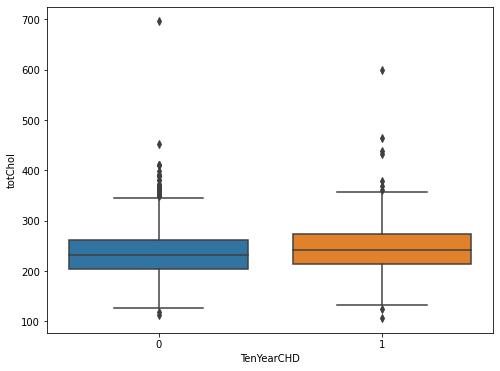

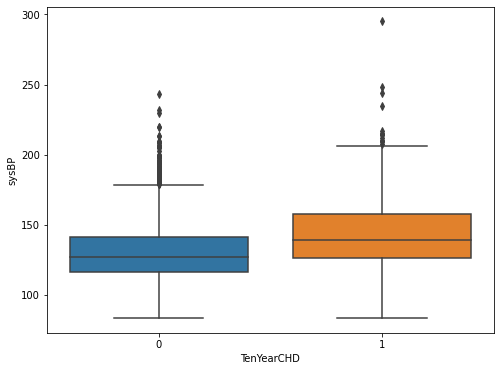

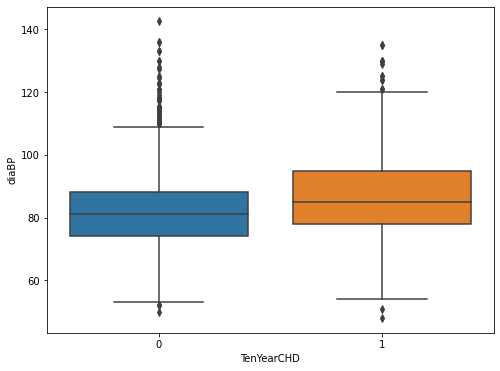

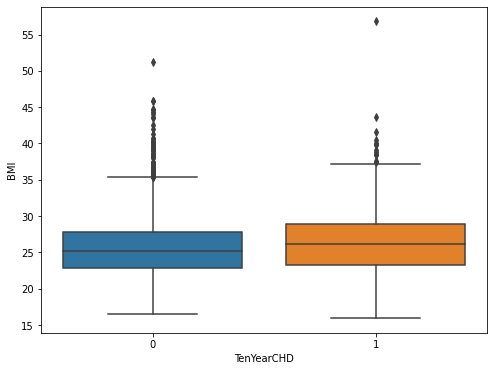

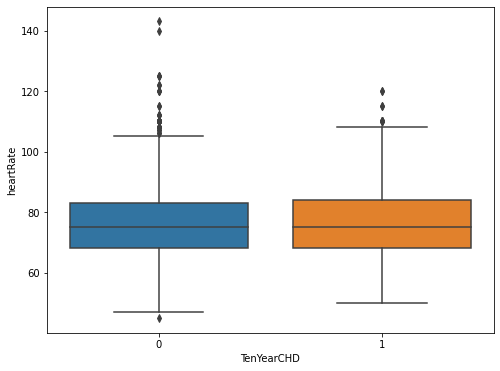

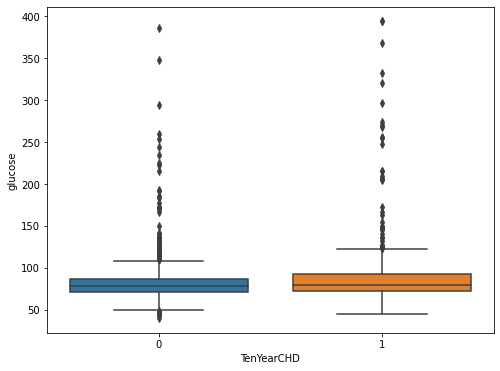

In [ ]:
# plotting boxplot for continous features for each class of dependent feature.
for col in cts_features:
  plt.figure(figsize = (8,6))
  sbn.boxplot(x = df[dep_variable],y = df[col])

**Summary**:
* **The risk of CHD is higher for older patients than younger patients.**
* No conclusive evidence on the risk of CHD with other continuous variables

###**Analyzing the relationship between the dependent variable and the discrete variables in the data**

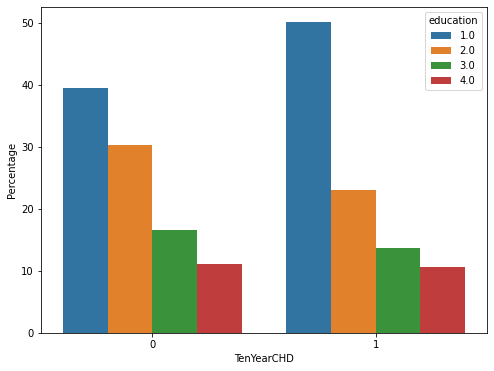

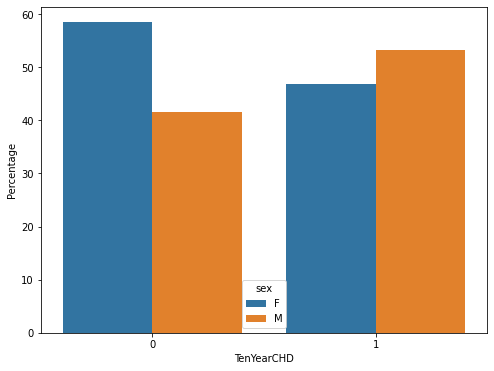

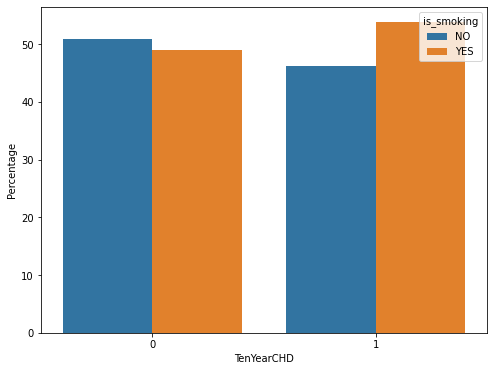

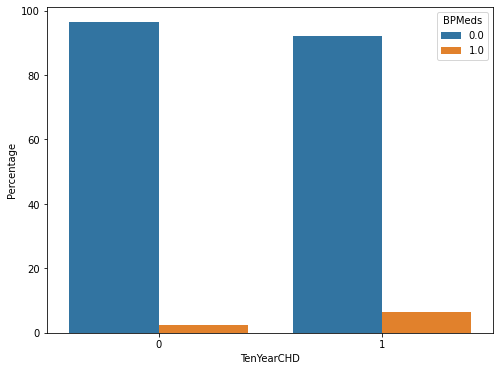

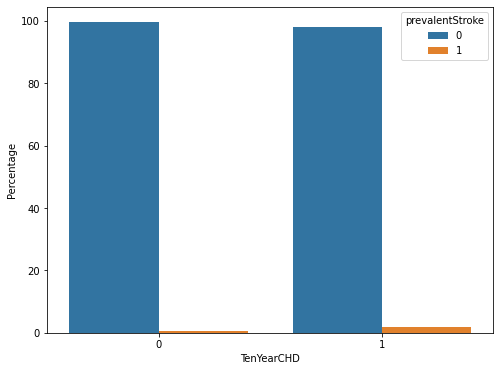

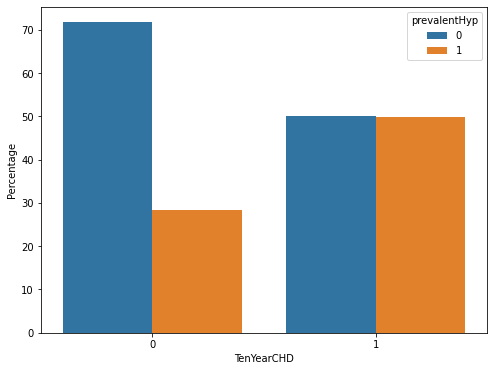

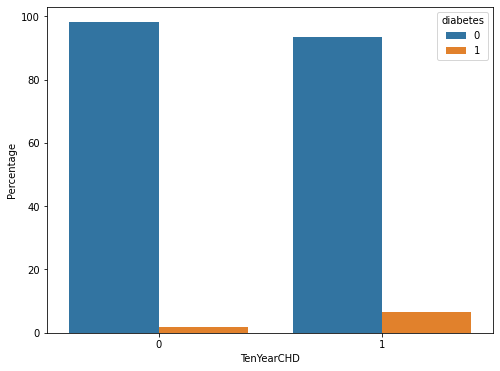

In [ ]:
# Plotting values for different categorical variables WTR to dependent variable

df_groupby = df.groupby(by = dep_variable)   # Grouping data by dependent variable
for col in cat_features:
  df_plot = pd.DataFrame((df_groupby[col].value_counts()/df_groupby['id'].count())*100).reset_index().rename(columns = {0:'Percentage'})
  # creating dataframe for each categorical variable with relative percentage.
  plt.figure(figsize = (8,6))
  sbn.barplot(x = df_plot[dep_variable], y = df_plot['Percentage'] , hue = df_plot[col])
  # plotting percentage wise barplot

**Summary:**

* **Percentage distribution of education level is almost similar for both high risk and low risk patients.**
* **More percentage of men are at high risk for getting cardiovascular disease.**
* **Higher percentage of people who are smoking are at high risk.**
* **For people at high risk of cardiovascular disease there is 50% chance that they had prevalent hypertension.**



### **Analyzing CHD risk for different desease conditions**.

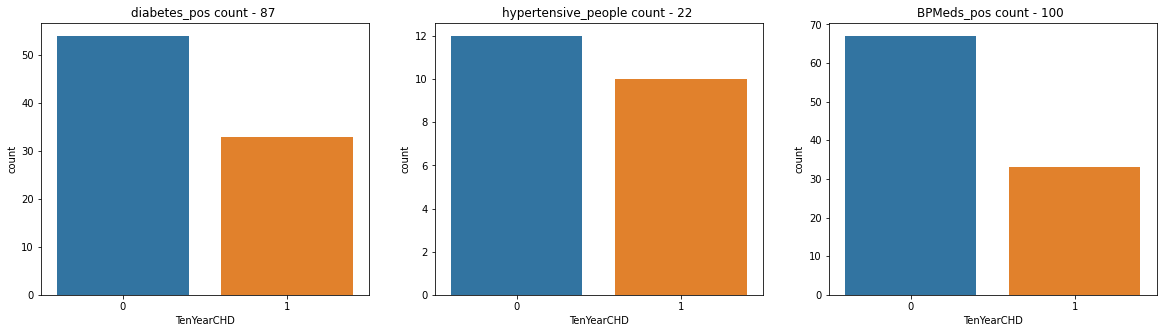

In [ ]:
# Plotting for different disease conditions

diabetes_pos = df[df['diabetes'] == 1]                # creating dataset for diabetes positive people.
hypertensive_people = df[df['prevalentStroke'] == 1]  # creating dataset for hypertensive people.
BPMeds_pos = df[df['BPMeds'] == 1]                    # creatinf dataset for people taking BP medicines.

# plotting countplot
fig, ax = plt.subplots(1,3,figsize = (20,5))
i = 0
for data_set in ['diabetes_pos','hypertensive_people', 'BPMeds_pos']:
  sbn.countplot(eval(data_set)[dep_variable],ax = ax[i])
  ax[i].set_title(f"{data_set} count - {eval(data_set).shape[0]} ")
  i += 1
plt.show()

In [ ]:
diabetes_pos[dep_variable].value_counts()

0    54
1    33
Name: TenYearCHD, dtype: int64

In [ ]:
hypertensive_people[dep_variable].value_counts()

0    12
1    10
Name: TenYearCHD, dtype: int64

In [ ]:
BPMeds_pos[dep_variable].value_counts()

0    67
1    33
Name: TenYearCHD, dtype: int64

**Summary:**

* **37.93% of people with diabetes have CHD**
* **45.45% of people with Hypertension have CHD**
* **33.33% of people who take BP medication have CHD**

### **Analyzing CHD risk for different age groups**

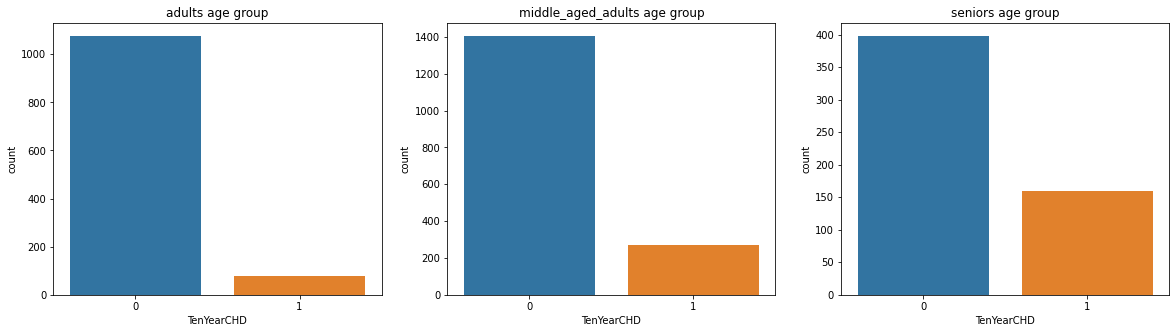

In [ ]:
#Plotting by different age group

seniors = df[df['age'] >= 60]   # Creating dataframe of senior people
adults = df[df['age'] < 45]     # Creating dataframe of adult (relatively younger) people
middle_aged_adults = df[(df['age'] >= 45) & (df['age'] < 60)]      # Creating dataframe of middle ages adult people

# Plotting countplot of disease risk for each age group
fig, ax = plt.subplots(1,3,figsize = (20,5))
i = 0
for data_set in ['adults','middle_aged_adults','seniors']:
  sbn.countplot(eval(data_set)[dep_variable],ax = ax[i])
  ax[i].set_title(f"{data_set} age group")
  i += 1
  
plt.show()

In [ ]:
seniors[dep_variable].value_counts()

0    398
1    159
Name: TenYearCHD, dtype: int64

In [ ]:
adults[dep_variable].value_counts()

0    1076
1      79
Name: TenYearCHD, dtype: int64

In [ ]:
middle_aged_adults[dep_variable].value_counts()

0    1405
1     273
Name: TenYearCHD, dtype: int64

**Summary**

* **28.54% of Senior age people(> 59 years) have CHD**
* **16.27% of middle age people(>45 & <60 years) have CHD**
* **6.82% of Adults(<45 years) have CHD**
* **Senior age groups (> 59 years) are relatively at much higher risk for cardiovascular disease and adults (>= 32 but < 45 years) are relatively at lowest risk.**

##**Multivariate analysis**

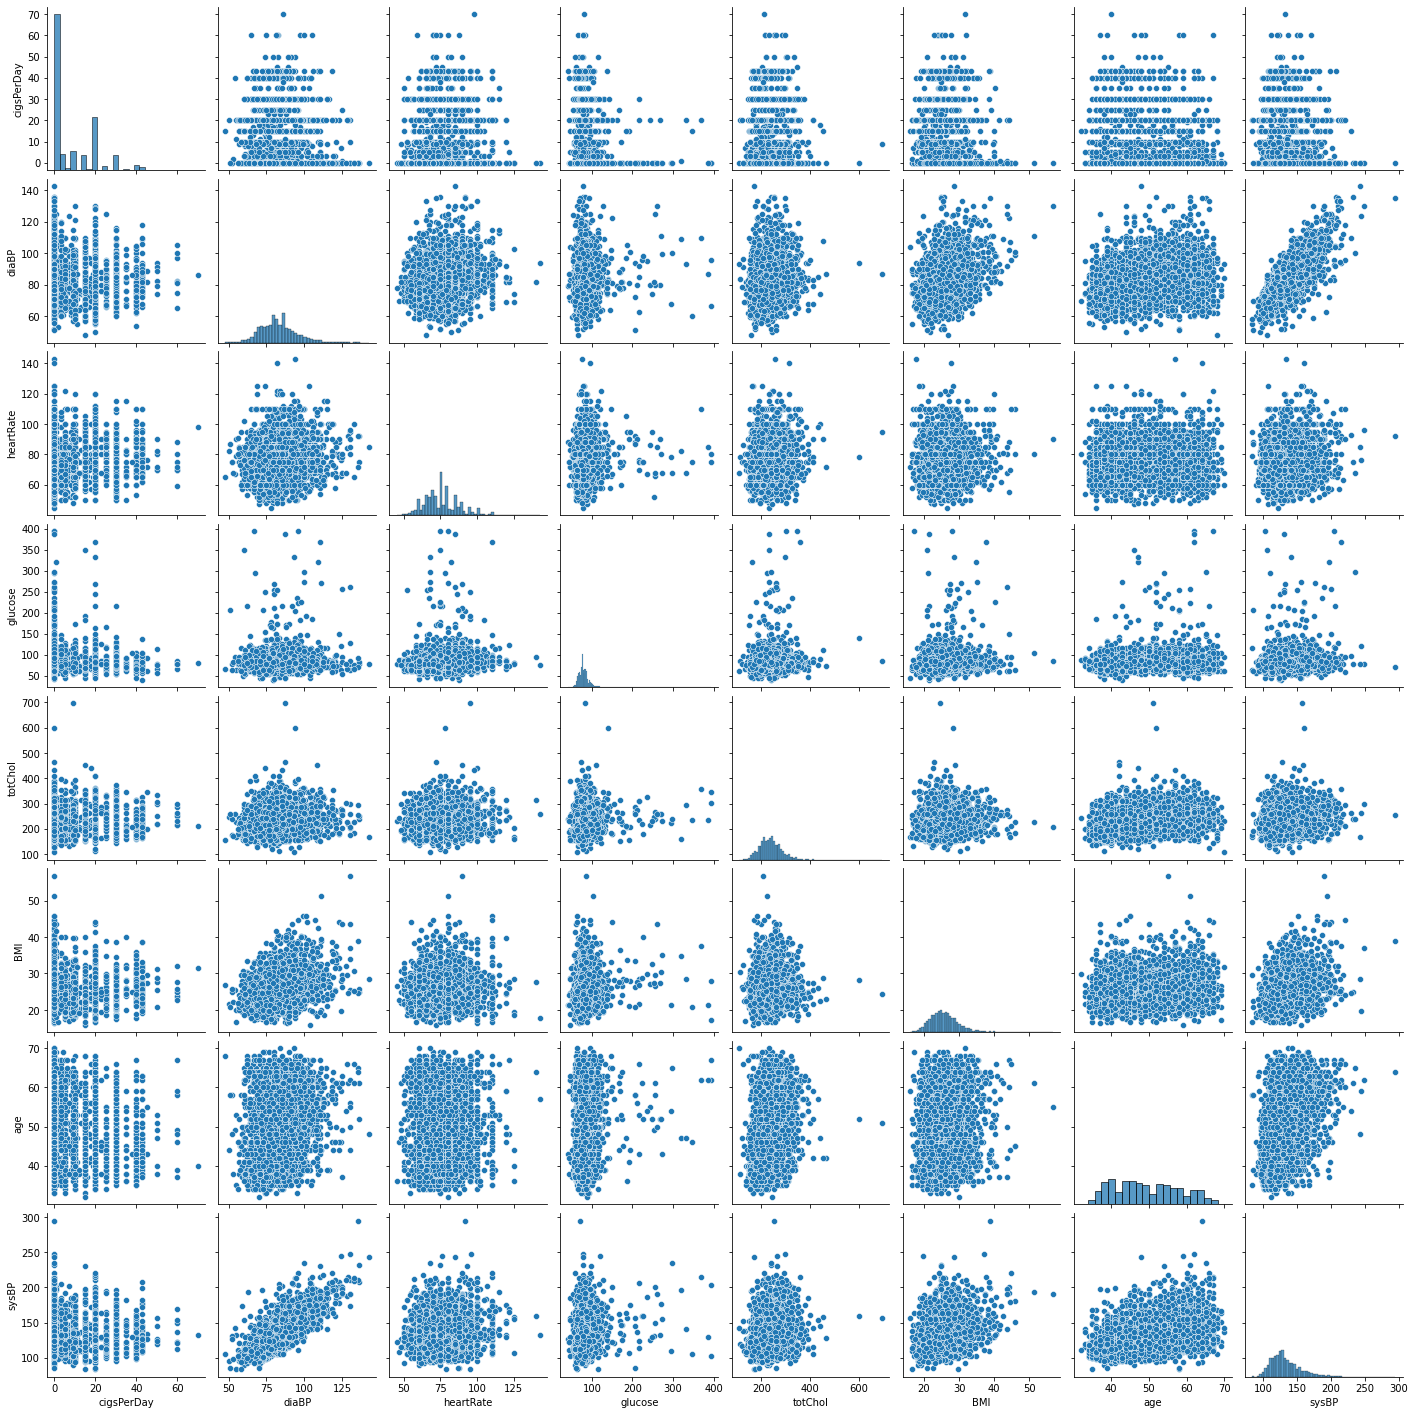

In [ ]:
# Plotting pair plot for numerical variables 
num_features = list(set(cts_features)-{'id'})   # removing id variable
num_df = df[num_features]
sbn.pairplot(num_df)
plt.show()

##**Corelation Analysis**

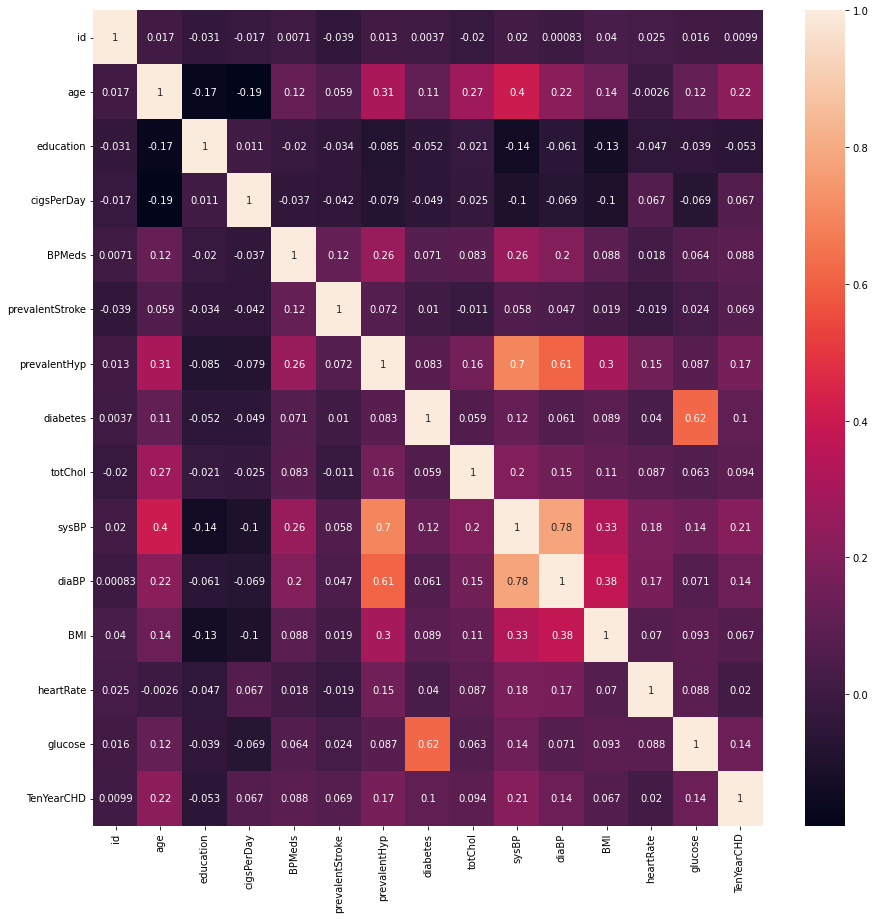

In [ ]:
# Checking correlation of each numerical feature
plt.figure(figsize = (15,15))
df_corr = df.corr()
sbn.heatmap(df_corr, annot = True)

**Summary**:
* **'sysBP' and 'diaBP' are highly correlated with 0.78 correlation.**
* **'glucose' and 'diabetes' are also slighly correlated with 0.62 correlation**
* **'sysBP' and 'prevalentHyp' are 0.7 correlated.**
* **'diaBP' and 'prevalentHyp' are also 0.61 correlated.**

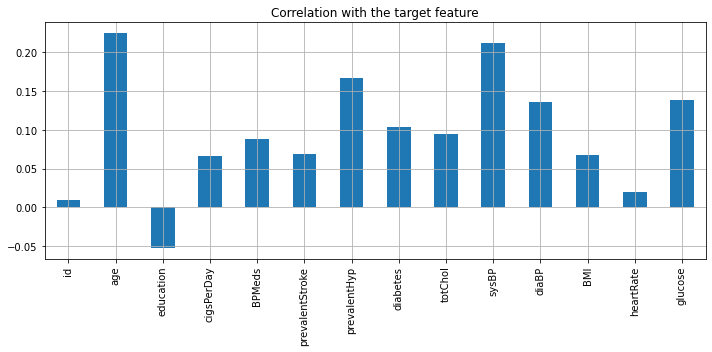

In [ ]:
# plotting correaltion with dependent feature

df.drop(dep_variable, axis=1).corrwith(df[dep_variable]).plot(kind='bar', grid=True, figsize=(10, 5), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

**No feature is strongly correlated with the dependent variable.**

# **Splitting data into train and test sets.**

In [ ]:
y = df[dep_variable]                       # target variable
x = df.drop(columns = [dep_variable])      # independent features
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

We have splitted data into train and test before feature engineering to avoid any kind of data leakage.

# **Data Cleanig & Feature Engineering**

##**Encoding the Categorical Features**

In [ ]:
x_train.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2134,2134,54,1.0,F,NO,0.0,0.0,0,0,0,272.0,146.0,95.0,23.66,72.0,80.0
1161,1161,37,2.0,M,YES,9.0,0.0,0,0,0,237.0,102.0,72.0,19.68,67.0,83.0
137,137,39,1.0,M,YES,43.0,0.0,0,1,0,291.0,177.5,100.0,25.74,67.0,91.0
2170,2170,55,1.0,F,NO,0.0,0.0,0,0,0,225.0,136.5,85.5,20.56,60.0,90.0
2876,2876,59,2.0,M,NO,0.0,0.0,0,0,0,237.0,131.5,84.0,24.17,90.0,94.0


Since, 'sex' and 'is_smoking' columns are in string format. We have to encode them to numerical data type.

In [ ]:
# Function for encoding

def encoding_variables(dataset):
  ''' input - dataframe
      This function inputs the dataframe and label encode the 'sex' and 'is_smoking' column and then 
      returns the modified dataframe.'''
  dataset['sex'] = np.where(dataset['sex'] == 'M',1,0)                         # encoding 'M' as 1 and 'F' as 0 in 'sex' column
  dataset['is_smoking'] = np.where(dataset['is_smoking'] == 'YES', 1,0)        # encoding 'YES' as 1 and 'NO' as 0 in 'is_smoking' column
  return dataset

In [ ]:
x_train = encoding_variables(x_train)      # encoding features of x_train dataset
x_test = encoding_variables(x_test)        # encoding features of x_test dataset

In [ ]:
x_train.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2134,2134,54,1.0,0,0,0.0,0.0,0,0,0,272.0,146.0,95.0,23.66,72.0,80.0
1161,1161,37,2.0,1,1,9.0,0.0,0,0,0,237.0,102.0,72.0,19.68,67.0,83.0
137,137,39,1.0,1,1,43.0,0.0,0,1,0,291.0,177.5,100.0,25.74,67.0,91.0
2170,2170,55,1.0,0,0,0.0,0.0,0,0,0,225.0,136.5,85.5,20.56,60.0,90.0
2876,2876,59,2.0,1,0,0.0,0.0,0,0,0,237.0,131.5,84.0,24.17,90.0,94.0


**Summary:**
* **Encoded (M,F) in sex column as (1,0)**
* **Encoded (Yes,No) in is_smoking Column as (1,0)**

##**Handling null values.**

In [ ]:
x_train.isnull().sum()  #checking null values in training dataset

id                   0
age                  0
education           70
sex                  0
is_smoking           0
cigsPerDay          17
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             25
sysBP                0
diaBP                0
BMI                 11
heartRate            1
glucose            243
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer   # Importing SimpleImputer

def impute_null_values(dataset_train, dataset_test, cts_features, cat_features):
  ''' input - training dataset, testing dataset, numerical features, categorical features 
      This function divides the input datasets into numerical and categorical datasets then apply different imputation techniques
      based on the numerical or categorical columns after that concats the dataframes and returns them. '''


  num_feat_train = dataset_train[cts_features]   # Creating numerical train dataframe
  num_feat_test  = dataset_test[cts_features]    # Creating numerical test dataframe
  cat_feat_train = dataset_train[cat_features]   # Creating categorical train dataframe
  cat_feat_test =  dataset_test[cat_features]    # Creating categorical test dataframe

  imputer1 = SimpleImputer(strategy = 'median')  # defining imputer for numerical columns
  imputer2 = SimpleImputer(strategy = 'most_frequent') # defining imputer for categorical columns

  num_feat_train = pd.DataFrame(imputer1.fit_transform(num_feat_train))       # fitting imputer on num train dataframe
  num_feat_train.columns = cts_features
  num_feat_test = pd.DataFrame(imputer1.transform(num_feat_test))             # fitting imputer on num test dataframe
  num_feat_test.columns = cts_features

  cat_feat_train = pd.DataFrame(imputer2.fit_transform(cat_feat_train))       # fitting imputer on categorical train dataframe
  cat_feat_train.columns = cat_features
  cat_feat_test = pd.DataFrame(imputer2.transform(cat_feat_test))             # fitting imputer on categorical test dataframe
  cat_feat_test.columns = cat_features

  dataset_train = pd.concat([num_feat_train,cat_feat_train], axis = 1)       # concatenating train dataframe
  dataset_test = pd.concat([num_feat_test,cat_feat_test], axis = 1)          # concatenating test dataframe
  return dataset_train, dataset_test

In [ ]:
x_train, x_test = impute_null_values(x_train,x_test,cts_features, cat_features)   # calling null values imputing function

In [ ]:
print(f"No. of null values in x_train dataset after imputation : {x_train.isnull().sum().sum()}.")
print(f"No. of null values in x_test dataset after imputation : {x_test.isnull().sum().sum()}.")

No. of null values in x_train dataset after imputation : 0.
No. of null values in x_test dataset after imputation : 0.


##**Feature Selection**

'id' feature is unique for each row and therefore not informative for model training. Hence we will drop 'id' column.

In [ ]:
def drop_column(dataset, col):
  ''' input - dataframe, column 
      This function inputs a dataframe and a column to drop from the dataframe and then
      returns the modified dataframe.'''
  dataset.drop(columns = [col], inplace = True)
  return dataset

In [ ]:
x_train = drop_column(x_train, 'id')    # dropping 'id' from x_train
x_test = drop_column(x_test, 'id')      # dropping 'id' from x_test

**Applying Chi-square test for feature selection from categorical features.**

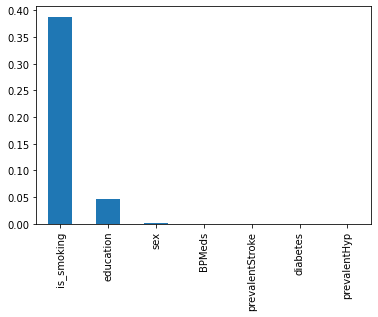

In [ ]:
from sklearn.feature_selection import chi2          # importing chi2
chi_scores = chi2(x_train[cat_features],y_train)    # calculating chi scores and corresponding p-values for only categorical features

p_values = pd.Series(chi_scores[1],index = x_train[cat_features].columns)      # creating dataframe of p-values of categorical features 
p_values.sort_values(ascending = False , inplace = True)                       # sorting dataframe

p_values.plot.bar()
plt.show()                                                            # plotting p-values bar plot

**Since, p-value for 'is_smoking' is very high, so we will drop that column.
Also one thing to notice is that, we are also given a column 'cigsPerDay' which tells us the average no. of ciggerates smoked per day by the person. If person doesn't smoke then it is zero. So, the information given in 'is_smoking' is already present in 'cigsPerDay'. Hence we can drop the 'is_smoking' column.**

In [ ]:
x_train = drop_column(x_train, 'is_smoking')
x_test = drop_column(x_test, 'is_smoking')

Calculating collinearity between each independent variable

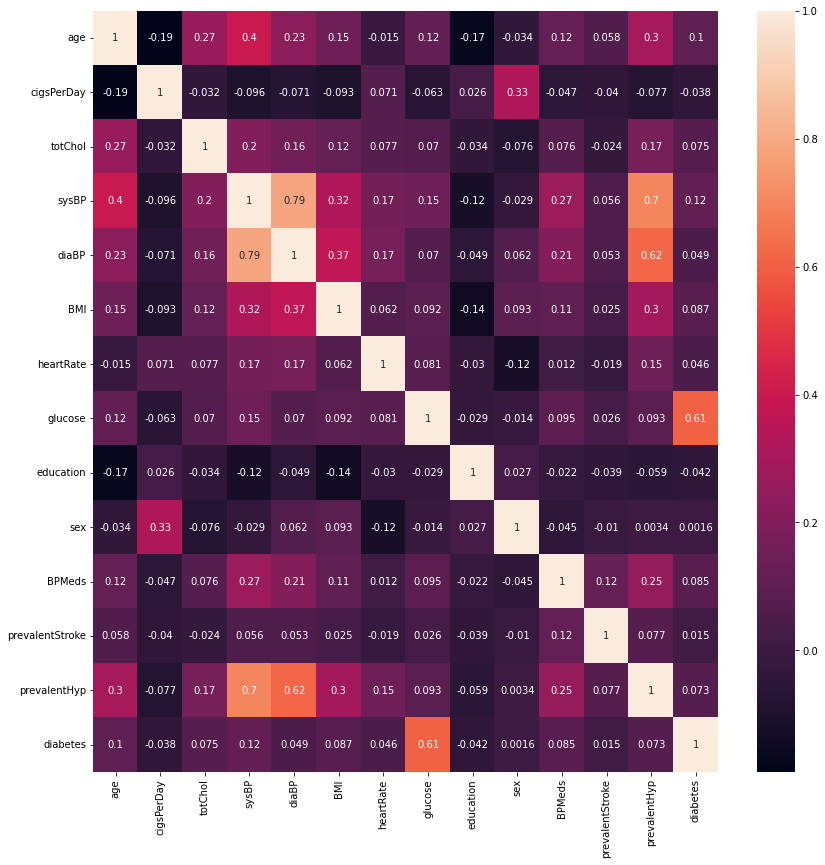

In [ ]:
x_train_corr = x_train.corr()
plt.figure(figsize = (14,14))
sbn.heatmap(x_train_corr, annot = True)

**Since 'sysBP' and 'diaBP' have high correlation we will drop one of them.**

In [ ]:
x_train = drop_column(x_train, 'diaBP')
x_test = drop_column(x_test, 'diaBP')

**We have dropped 'diaBP' column.**

##**Handling Skewness**

In [ ]:
# checking skewness of cts numerical features
x_train[['age','cigsPerDay','totChol','BMI','sysBP','heartRate','glucose']].skew()

age           0.226856
cigsPerDay    1.193935
totChol       1.096632
BMI           1.040581
sysBP         1.222969
heartRate     0.660109
glucose       6.539919
dtype: float64

In [ ]:
# Applying log10 transformation to reduce skewness
np.log10(x_train[['age','cigsPerDay','totChol','BMI','sysBP','heartRate','glucose']]).skew()

age          -0.017192
cigsPerDay         NaN
totChol       0.064625
BMI           0.359000
sysBP         0.625883
heartRate     0.144671
glucose       2.390359
dtype: float64

In [ ]:
# Apply sqrt transformation to reduce skewness
np.sqrt(x_train[['age','cigsPerDay','totChol','BMI','sysBP','heartRate','glucose']]).skew()

age           0.105442
cigsPerDay    0.469819
totChol       0.497706
BMI           0.672935
sysBP         0.904974
heartRate     0.395982
glucose       4.154347
dtype: float64

In [ ]:
# Function for data transformation

def reduce_skewness(dataset):
  '''input - dataframe
    This function takes the skewed dataframe and applies transformation on them
    and returns the transformed dataframe.'''
  dataset[['totChol','sysBP','BMI','heartRate','glucose']] = np.log10(dataset[['totChol','sysBP','BMI','heartRate','glucose']])
  dataset[['cigsPerDay']] = np.sqrt(dataset[['cigsPerDay']])
  return dataset

In [ ]:
x_train = reduce_skewness(x_train)   # reducing skewness of x_train
x_test = reduce_skewness(x_test)     # reducing skewness of x_test

##**Handling Imbalanced dataset**

In [ ]:
y_train.value_counts()

0    2305
1     407
Name: TenYearCHD, dtype: int64

 **Oversampling:**
* Since we are dealing with unbalanced data, ie, only ~15% of the patients were diagnosed with coronary heart disease, we oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique).
* This ensures that the model has trained equally on all kinds of results, and it is not biased to one particular result.

In [ ]:
x_train.head()

,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,education,sex,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,54.0,0.000000,2.434569,2.164353,1.374015,1.857332,1.903090,1.0,0.0,0.0,0.0,0.0,0.0
1,37.0,3.000000,2.374748,2.008600,1.294025,1.826075,1.919078,2.0,1.0,0.0,0.0,0.0,0.0
2,39.0,6.557439,2.463893,2.249198,1.410609,1.826075,1.959041,1.0,1.0,0.0,0.0,1.0,0.0
3,55.0,0.000000,2.352183,2.135133,1.313023,1.778151,1.954243,1.0,0.0,0.0,0.0,0.0,0.0
4,59.0,0.000000,2.374748,2.118926,1.383277,1.954243,1.973128,2.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from imblearn.over_sampling import SMOTENC
smotenc = SMOTENC([8,9,10,11,12],random_state = 101)
x_smote, y_smote = smotenc.fit_resample(x_train, y_train)

In [ ]:
y_smote.value_counts()

0    2305
1    2305
Name: TenYearCHD, dtype: int64

##**Data Scaling**

**Scaling the data:**
* Since the predictions from the distance based models will get affected if the attributes are in different ranges, we need to scale them.
* We can use StandardScaler to scale down the variables.
* The results obtained from scaling can be stored and used while building those models.
* Tree algorithms do not necessarily require scaling.

In [ ]:
# Function for scaling data

from sklearn.preprocessing import StandardScaler

def rescaling(x_train, x_test):
  ''' input - training dataset, testing dataset
      This functions input a pair of datasets one training and other one testing.
      This funtions fits and transforms the scaler on training dataset and uses same scaler to transform
      the testing dataset. It returns the transformed datasets.'''
  scale = StandardScaler()
  x_train_scaled = scale.fit_transform(x_smote)
  x_test_scaled = scale.transform(x_test)

  return x_train, x_test

# **Model Training and evaluation**

**Evaluation metrics:**
* Since the data we are dealing with is unbalanced, accuracy may not be the best evaluation metric to evaluate the model performance.
* Also, since we are dealing with data related to healthcare, False Negatives are of higher concern than False Positive
* In other words, it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected
* Considering these points in mind, it is decided that we use **Recall** as the model evaluation metric.


\begin{align}
        Recall = \frac{True Positive}{True Positive + False Negative}
    \end{align}

##**Without hyperparameter tuning**

In [ ]:
# Function for evaluating models

def evaluating_model(model,x_train, x_test, y_train, y_test):
  '''This fucntion inputs the model and various datasets.
     It then predicts using the model and input datasets after that it evaluates the prediction
     using various metrics and returns the result of evaluation.'''
  y_train_pred = model.predict(x_train)                         
  y_train_pred_proba = model.predict_proba(x_train)[:,1]
  y_pred = model.predict(x_test)
  y_pred_proba = model.predict_proba(x_test)[:, 1]

  print('-------------- Train set evaluation ---------------')

  print(f"Train accuracy_score : {round(accuracy_score(y_train,y_train_pred),4)}")
  
  print(f"Train roc_auc_score : {round(roc_auc_score(y_train,y_train_pred_proba),4)}")

  print(f"Train f1_score : {round(f1_score(y_train,y_train_pred),4)}")
  
  print(f"Train precision score : {round(precision_score(y_train,y_train_pred),4)}")

  print(f"Train recall score : {round(recall_score(y_train,y_train_pred),4)}")

  print(f"Train confusion matrix : \n{confusion_matrix(y_train,y_train_pred)}\n")

  print('-------------- Test set evaluation ---------------')

  print(f"Test accuracy_score : {round(accuracy_score(y_test,y_pred),4)}")
  
  print(f"Test roc_auc_score : {round(roc_auc_score(y_test,y_pred_proba),4)}")

  print(f"Test f1_score : {round(f1_score(y_test,y_pred),4)}")
  
  print(f"Test precision score : {round(precision_score(y_test,y_pred),4)}")

  print(f"Test recall score : {round(recall_score(y_test,y_pred),4)}\n")

  print(f"Test confusion matrix : \n{confusion_matrix(y_test,y_pred)}\n")

In [ ]:
# Defining functions for defining various models without hyperparameter tuning

def decisiontree_fit(x_train,y_train):
  ''' Defining and training Decision Tree model '''
  DT = DecisionTreeClassifier()
  DT.fit(x_train,y_train)
  return DT

def randomforest_fit(x_train, y_train):
  ''' Defining and training random forest model '''
  RF = RandomForestClassifier( random_state = 0)
  RF.fit(x_train,y_train)
  return RF

def gradientboosting_fit(x_train,y_train):
  ''' Defining and training gradient boosting model '''
  GB1 = GradientBoostingClassifier(random_state = 0)
  GB1.fit(x_train,y_train)
  return GB1

def supportvector_fit(x_train, y_train):
  ''' Defining and training SVM model '''
  svc1 = SVC(probability = True)
  svc1.fit(x_train,y_train)
  return svc1

def logisticregression_fit(x_train,y_train):
  ''' Defining and training logistic regression model '''
  logreg = LogisticRegression()
  logreg.fit(x_train, y_train)
  return logreg

def knn_fit(x_train,y_train):
  ''' Defining and training knn model '''
  knn = KNeighborsClassifier()
  knn.fit(x_train,y_train)
  return knn

In [ ]:
# Defining random forest model
dt1 = decisiontree_fit(x_smote,y_smote)

# Defining random forest model
rf1 = randomforest_fit(x_smote, y_smote)

# Defining gradient boosting model
gb1 = gradientboosting_fit(x_smote, y_smote)

# Scaling data for models that require data to be standarized
x_train_scaled, x_test_scaled = rescaling(x_smote, x_test)

# Defining SVM model
svm1 = supportvector_fit(x_train_scaled,y_smote)

# Defining logistic regression model
lr1 = logisticregression_fit(x_train_scaled,y_smote)

# Defining knn model
knn1 = knn_fit(x_train_scaled,y_smote)

In [ ]:
# Evaluating random Decision Tree model
evaluating_model(dt1,x_smote,x_test,y_smote,y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 1.0
Train roc_auc_score : 1.0
Train f1_score : 1.0
Train precision score : 1.0
Train recall score : 1.0
Train confusion matrix : 
[[2305    0]
 [   0 2305]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.6947
Test roc_auc_score : 0.5559
Test f1_score : 0.2633
Test precision score : 0.209
Test recall score : 0.3558

Test confusion matrix : 
[[434 140]
 [ 67  37]]



In [ ]:
# Evaluating random forest model
evaluating_model(rf1,x_smote, x_test, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 1.0
Train roc_auc_score : 1.0
Train f1_score : 1.0
Train precision score : 1.0
Train recall score : 1.0
Train confusion matrix : 
[[2305    0]
 [   0 2305]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.7625
Test roc_auc_score : 0.6731
Test f1_score : 0.2907
Test precision score : 0.2683
Test recall score : 0.3173

Test confusion matrix : 
[[484  90]
 [ 71  33]]



In [ ]:
# Evaluating GBBoost model
evaluating_model(gb1,x_smote, x_test, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.8555
Train roc_auc_score : 0.9331
Train f1_score : 0.8553
Train precision score : 0.8565
Train recall score : 0.8542
Train confusion matrix : 
[[1975  330]
 [ 336 1969]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.705
Test roc_auc_score : 0.6491
Test f1_score : 0.2754
Test precision score : 0.2209
Test recall score : 0.3654

Test confusion matrix : 
[[440 134]
 [ 66  38]]



In [ ]:
# Evaluating SVM model
evaluating_model(svm1,x_train_scaled, x_test_scaled, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.6525
Train roc_auc_score : 0.7117
Train f1_score : 0.6687
Train precision score : 0.6389
Train recall score : 0.7015
Train confusion matrix : 
[[1391  914]
 [ 688 1617]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.5914
Test roc_auc_score : 0.6881
Test f1_score : 0.3357
Test precision score : 0.2236
Test recall score : 0.6731

Test confusion matrix : 
[[331 243]
 [ 34  70]]



In [ ]:
# Evaluating Logistic regression model
evaluating_model(lr1,x_train_scaled, x_test_scaled, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.674
Train roc_auc_score : 0.7373
Train f1_score : 0.6756
Train precision score : 0.6723
Train recall score : 0.679
Train confusion matrix : 
[[1542  763]
 [ 740 1565]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.6327
Test roc_auc_score : 0.6465
Test f1_score : 0.3215
Test precision score : 0.2243
Test recall score : 0.5673

Test confusion matrix : 
[[370 204]
 [ 45  59]]



In [ ]:
# Evaluating KNN model
evaluating_model(knn1,x_train_scaled, x_test_scaled, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.8696
Train roc_auc_score : 0.9541
Train f1_score : 0.8764
Train precision score : 0.8331
Train recall score : 0.9245
Train confusion matrix : 
[[1878  427]
 [ 174 2131]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.6844
Test roc_auc_score : 0.6209
Test f1_score : 0.3097
Test precision score : 0.233
Test recall score : 0.4615

Test confusion matrix : 
[[416 158]
 [ 56  48]]



##**With hyperparameter tuning**

In [ ]:
def decisiontree_fit_hpt(x_train,y_train):
  ''' defining decision tree model with hyperparameter tuning'''

  param_dict = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }
  DF =  DecisionTreeClassifier()
  model =  RandomizedSearchCV(estimator = DF, param_distributions = param_dict, scoring = 'f1' ,
                               cv = 5, random_state= 10)   
  model.fit(x_train,y_train)
  return model   



    
def randomforest_fit_hpt(x_train, y_train):
  ''' defining random forest model with hyperparameter tuning''' 
  param_dict = {'n_estimators' : [1000],
                'criterion' : ['gini'],
                'max_depth' : list(np.linspace(4, 45,  dtype = int)),
                'max_features' : ['sqrt', 'log2', 0.3,0.4,0.5],
                # 'min_samples_split' : list(np.linspace(4, 30, dtype = int)) ,
                'max_samples' : list(np.linspace(0.4,1,7)),
                'min_samples_leaf' : list(np.linspace(15, 45, 15, dtype = int))}
                #'max_leaf_nodes' : list(np.linspace(1, 100, 25, dtype = int))}
  RF = RandomForestClassifier( random_state = 0)
  model = RandomizedSearchCV(estimator = RF, param_distributions = param_dict, scoring = 'f1' ,
                               cv = 5, random_state= 10)
  model.fit(x_train,y_train)
  return model




def logisticregression_fit_hpt(x_train,y_train):
  ''' defining logistic regression with hyperparameter tuning'''
  param_dict = {'penalty' : ['l1', 'l2', 'elasticnet'],
              'C' : list(np.linspace(0.01,10,100)),
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
  logreg = LogisticRegression(random_state = 0)
  model = RandomizedSearchCV(estimator = logreg, param_distributions = param_dict, scoring = 'f1' ,
                               cv = 5, random_state= 10)

  model.fit(x_train, y_train)
  return model

  

##**With hyperparameter tuning GCV**

In [ ]:
def decisiontree_fit_hpt(x_train,y_train):
  ''' defining decision tree model with hyperparameter tuning'''

  dt_params = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }
  DF =  DecisionTreeClassifier()
  model =  dt_gridsearch = GridSearchCV(DF,
                             dt_params,
                             cv=5,
                             scoring= 'recall')
  model.fit(x_train,y_train)
  return model   



    
def randomforest_fit_hpt(x_train, y_train):
  ''' defining random forest model with hyperparameter tuning''' 
  rf_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':np.arange(1,6),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}
  RF = RandomForestClassifier( random_state = 0)
  model = GridSearchCV(RF,rf_params,cv=5,scoring='recall')
  model.fit(x_train,y_train)
  return model




def logisticregression_fit_hpt(x_train,y_train):
  ''' defining logistic regression with hyperparameter tuning'''
  param_dict = {'penalty' : ['l1', 'l2', 'elasticnet'],
              'C' : list(np.linspace(0.01,10,100)),
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
  logreg = LogisticRegression(random_state = 0)
  model = RandomizedSearchCV(estimator = logreg, param_distributions = param_dict, scoring = 'f1' ,
                               cv = 5, random_state= 10)

  model.fit(x_train, y_train)
  return model

In [ ]:
#fitting Random Forest and Logistic Regression model with hyperparameter
dt2 = decisiontree_fit_hpt(x_smote,y_smote)

rf2 = randomforest_fit_hpt(x_smote,y_smote)

lr2 = logisticregression_fit_hpt(x_smote,y_smote)

In [ ]:
#desicion tree best parameters 
dt2.best_params_

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [ ]:
#random forest best parameters 
rf2.best_params_

{'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [ ]:
#logistic regression best parameters 
lr2.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 7.376363636363636}

In [ ]:
# Evaluating decision tree model
evaluating_model(dt2,x_smote, x_test, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.6362
Train roc_auc_score : 0.6362
Train f1_score : 0.689
Train precision score : 0.6017
Train recall score : 0.8061
Train confusion matrix : 
[[1075 1230]
 [ 447 1858]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.4941
Test roc_auc_score : 0.6225
Test f1_score : 0.3288
Test precision score : 0.2064
Test recall score : 0.8077

Test confusion matrix : 
[[251 323]
 [ 20  84]]



In [ ]:
# Evaluating random forest model
evaluating_model(rf2,x_smote, x_test, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.698
Train roc_auc_score : 0.7547
Train f1_score : 0.6967
Train precision score : 0.6998
Train recall score : 0.6937
Train confusion matrix : 
[[1619  686]
 [ 706 1599]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.6431
Test roc_auc_score : 0.6827
Test f1_score : 0.3424
Test precision score : 0.2386
Test recall score : 0.6058

Test confusion matrix : 
[[373 201]
 [ 41  63]]



In [ ]:
# Evaluating Logistic regression model
evaluating_model(lr2,x_smote, x_test, y_smote, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.6846
Train roc_auc_score : 0.7533
Train f1_score : 0.686
Train precision score : 0.683
Train recall score : 0.6889
Train confusion matrix : 
[[1568  737]
 [ 717 1588]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.6283
Test roc_auc_score : 0.655
Test f1_score : 0.3298
Test precision score : 0.2279
Test recall score : 0.5962

Test confusion matrix : 
[[364 210]
 [ 42  62]]



**Summary :**

**After HyperParameter Tuning Decision tree has the best recall score of 80.74%**

In [ ]:
# predicting probability of each class by hyperparameter tuned Random forest model
predicted_proba = rf2.predict_proba(x_test)

accuracy = []
f1scores = []
precisionscore = []
recallscore = []

# for loop for different value of threshold
for threshold in np.linspace(0.1,0.9,50):
  predicted_proba[:,1] >= threshold
  predictions = (predicted_proba [:,1] >= threshold).astype('int')
  accuracy.append(accuracy_score(y_test,predictions))
  f1scores.append(f1_score(y_test,predictions))
  precisionscore.append(precision_score(y_test,predictions))
  recallscore.append(recall_score(y_test,predictions))

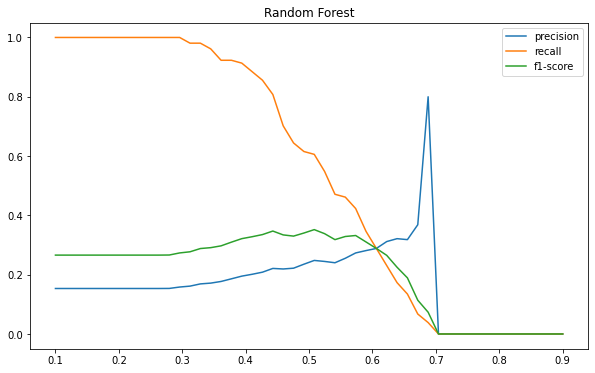

In [ ]:
# plotting the recall, precision and f1-score for different threshold of Random forest
plt.figure(figsize = (10,6))
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = precisionscore, label = 'precision')
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = recallscore, label = 'recall')
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = f1scores, label = 'f1-score')
plt.title('Random Forest')
plt.show()

In [ ]:
# predicting probability of each class by hyperparameter tuned Logistic Regression model
predicted_proba = lr2.predict_proba(x_test)

accuracy = []
f1scores = []
precisionscore = []
recallscore = []

# for loop for different value of threshold
for threshold in np.linspace(0.1,0.9,50):
  predicted_proba[:,1] >= threshold
  predictions = (predicted_proba [:,1] >= threshold).astype('int')    
  accuracy.append(accuracy_score(y_test,predictions))
  f1scores.append(f1_score(y_test,predictions))
  precisionscore.append(precision_score(y_test,predictions))
  recallscore.append(recall_score(y_test,predictions))

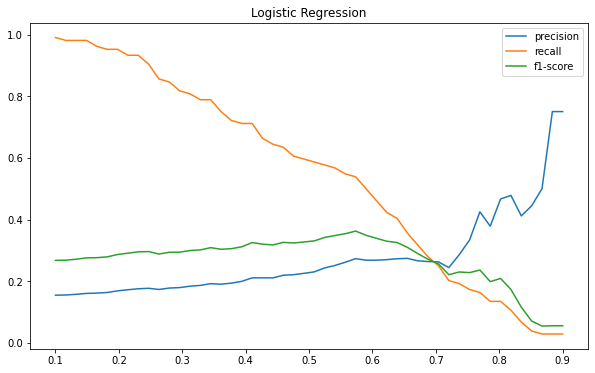

In [ ]:
# plotting the recall, precision and f1-score for different threshold of Logistic Regression
plt.figure(figsize = (10,6))
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = precisionscore, label = 'precision')
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = recallscore, label = 'recall')
sbn.lineplot(x = np.linspace(0.1,0.9,50), y = f1scores, label = 'f1-score')
plt.title('Logistic Regression')
plt.show()

# **Conclusion**

*   Without Hyperparameter tuning all models are overfitting
*   F1 score didn't improved even afer hyper parameter tuning may be due to lack of specific relation between features

*   Desicion Tress , Logistic regression with hyperparameter tuning performed better than other models but Decision tree has highest recall score of 80.74%
*   For other models Lower threshold value is prefered as it gives better recall 





# **References:**

* GeekforGeeks 
* Towards data science
* Analytics Vidhya
* ProjectPro
* Kaggle
* W3 school
* Pythonguides
* Stackoverflow
* Python libraries technical documentation
* Krish Naik on Youtube
* Codebasics on Youtube
* 3blue1brown on Youtube
